In [54]:
import embeddings
import skeletons_utils
import skeletons
import scipy.io
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from collections import Counter

# Dauphine features

In [3]:
m = scipy.io.loadmat('./datasets/dauphine/dauphine_long_features')
from scipy.io import savemat, whosmat
whosmat('./datasets/dauphine/dauphine_long_features')

m = m['features']

In [4]:
dauphine_features = embeddings.center_and_scale(m)

In [5]:
np.shape(dauphine_features)

(2048, 10734)

In [6]:
rank = np.linalg.matrix_rank(dauphine_features)
# Descriptive statistics
mean = np.mean(dauphine_features)
median = np.median(dauphine_features)
std_dev = np.std(dauphine_features)
min_val = np.min(dauphine_features)
max_val = np.max(dauphine_features)
print(rank, mean,median,std_dev,min_val,max_val)

2047 -6.700761330602605e-20 -0.3520251342127171 1.0 -0.8438960785169639 20.67201518234581


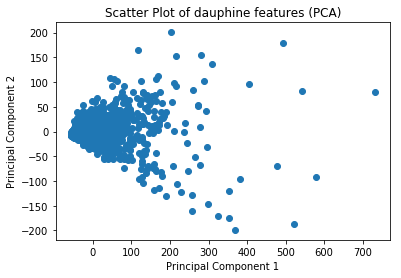

In [7]:
# Two dimmensional PCA for visualization
pca = PCA(n_components=2)
dauphine_reduced = pca.fit_transform(dauphine_features)

# Scatter plot of reduced features
plt.scatter(dauphine_reduced[:, 0], dauphine_reduced[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of dauphine features (PCA)')
plt.show()

In [10]:
# Calculate distances from the origin
distances = np.linalg.norm(dauphine_reduced, axis=1)

# Sort points based on distances
sorted_indices = np.argsort(distances)[::-1]
sorted_distances = distances[sorted_indices]
sorted_points = dauphine_reduced[sorted_indices]

# Define a threshold for "very distant" points
threshold = 200

# Identify points that exceed the threshold
distant_points = sorted_points[sorted_distances > threshold]
n_distant_points = (len(distant_points) / len(sorted_points)) * 100
distant_indices = sorted_indices[sorted_distances > threshold]

# Sort distant points by their original indices
sorted_distant_indices = np.sort(distant_indices)
sorted_distant_points = distant_points[np.argsort(distant_indices)]

# Print the sorted indices and coordinates of the distant points
print("percentage of distant points:", n_distant_points)
for index, point in zip(sorted_distant_indices, sorted_distant_points):
    print("Index:", index, "Coordinates:", point)

percentage of distant points: 2.1484375
Index: 48 Coordinates: [ 354.29660658 -119.7363704 ]
Index: 67 Coordinates: [494.35515929 178.33208445]
Index: 86 Coordinates: [ 190.42269048 -129.98918136]
Index: 103 Coordinates: [ 256.61489183 -127.68329397]
Index: 107 Coordinates: [ 299.77684726 -147.30161913]
Index: 124 Coordinates: [406.23406977  96.96736692]
Index: 135 Coordinates: [ 324.62974517 -171.55502083]
Index: 138 Coordinates: [732.44865181  79.06285566]
Index: 150 Coordinates: [382.62354084 -95.31836748]
Index: 219 Coordinates: [216.44171492  92.8912978 ]
Index: 327 Coordinates: [263.59042353 -51.48592829]
Index: 350 Coordinates: [271.35809244  52.79970872]
Index: 351 Coordinates: [179.5859705  -90.28767003]
Index: 355 Coordinates: [205.46556818  60.58032764]
Index: 395 Coordinates: [201.44486211 200.80943948]
Index: 435 Coordinates: [280.10432003 155.26910586]
Index: 469 Coordinates: [278.0171919    9.45965381]
Index: 511 Coordinates: [296.12065157 -30.81912573]
Index: 512 Coordi

# Dauphine skeletons

## Dauphine incomplete skeletons

In [16]:
mat = scipy.io.loadmat('./datasets/dauphine/dauphine_long_skel.mat')
whosmat('./datasets/dauphine/dauphine_long_skel.mat')

mat = mat['skeldata']

In [17]:
dauphine_skeletons = skeletons_utils.missing_to_nan(mat.T)

In [18]:
np.shape(dauphine_skeletons)

(28232, 55)

In [19]:
coordinates_index_list = [1,2, 4,5, 7,8, 10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35, 37,38, 40,41, 43,44, 46,47, 49,50, 52,53]
dauphine_skeletons = dauphine_skeletons[:, coordinates_index_list]

In [20]:
np.shape(dauphine_skeletons)

(28232, 36)

In [ ]:
missing_mask = np.isnan(dauphine_skeletons)
missing_distribution = np.sum(missing_mask, axis=1)
missing_percentages = (missing_distribution/ len(dauphine_skeletons[0])) * 100
missing_stats = pd.DataFrame({'Missing Values': missing_distribution, 'Missing Percentage': missing_percentages})
missing_stats = missing_stats.sort_values(by='Missing Values', ascending=False)
print(missing_stats)

In [22]:
count_missing_indexes = len(missing_stats[missing_stats['Missing Values'] > 0])
print(count_missing_indexes)

22569


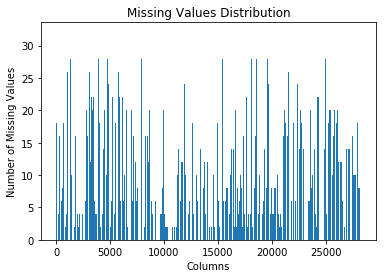

In [23]:
# Create a bar plot to visualize the missing values distribution per skeletons
x = np.arange(len(missing_distribution))
plt.bar(x, missing_distribution)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Distribution per skeleton')
plt.show()

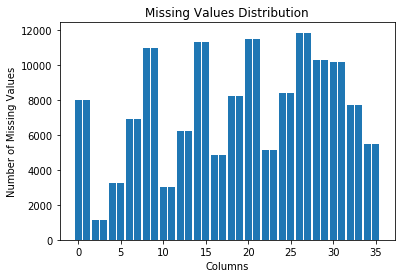

In [41]:
# Create a bar plot to visualize the missing values distribution per joints
x = np.arange(len(np.sum(missing_mask, axis=0)))
plt.bar(x, np.sum(missing_mask, axis=0))
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Distribution per joint')
plt.show()

## Dauphine complete skeletons

In [25]:
dauphine_skel = np.load('dauphine_long_skel.npy')
dauphine_skel = dauphine_skel.T

In [26]:
np.shape(dauphine_skel)

(36, 28232)

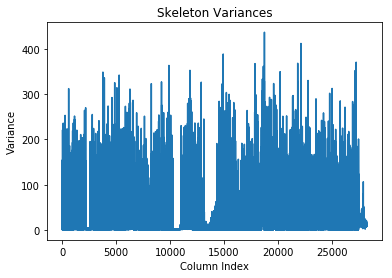

In [27]:
variances = np.var(dauphine_skel, axis=0)

# Plot the sorted variances
plt.plot(variances)
plt.xlabel('Column Index')
plt.ylabel('Variance')
plt.title('Skeleton Variances')
plt.show()

In [28]:
# Calculate the quantiles, minimum, and maximum of the variance distribution
quantiles = np.quantile(variances, [0.25, 0.5, 0.75])
minimum = np.min(variances)
maximum = np.max(variances)

print("Quantiles:", quantiles)
print("Minimum:", minimum)
print("Maximum:", maximum)

Quantiles: [ 1.05785356  3.14683065 17.86138767]
Minimum: 0.11448177968662548
Maximum: 436.56236923112033


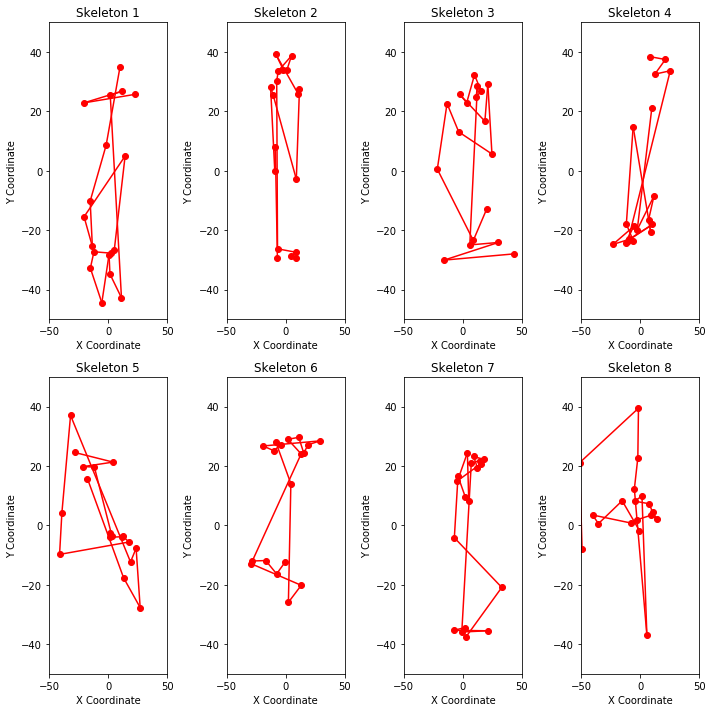

In [29]:
#Top 8 skeletons with higher variance
sorted_indexes = np.argsort(-variances)
top_indexes = sorted_indexes[:8]


fig, axs = plt.subplots(2, 4, figsize=(10, 10))

# Iterate over the skeleton indices and plot each skeleton
for i, ax in enumerate(axs.flatten()):
    # Extract the coordinates of the current skeleton
    skeleton_coords = dauphine_skel[:, top_indexes[i]].reshape(18, 2)
    
    # Plot the skeleton
    ax.scatter(skeleton_coords[:, 0], skeleton_coords[:, 1], color='red')
    
    # Connect the joints with lines
    for j in range(len(skeleton_coords)-1):
        ax.plot([skeleton_coords[j, 0], skeleton_coords[j+1, 0]],
                 [skeleton_coords[j, 1], skeleton_coords[j+1, 1]], color='red')
    
    # Set plot limits
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)
    
    # Add labels and title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Skeleton {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
#28 of the top 50 skeletons with higher variance had more than 65% NAs
top_50_indexes = sorted_indexes[:50]
indexes_with_high_missing = missing_stats[missing_stats['Missing Percentage'] > 65].index

check_result = sum(index in indexes_with_high_missing for index in top_50_indexes)
print(check_result)

28


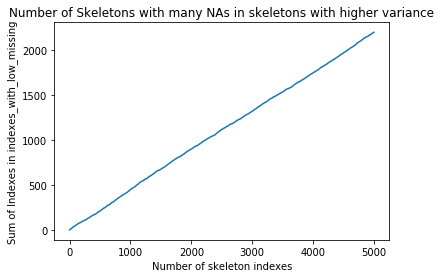

In [36]:
indexes_with_high_missing = missing_stats[missing_stats['Missing Percentage'] > 65].index
sum_values = []
index_range = range(5000)

for i in index_range:
    top_index = sorted_indexes[:i]
    count = sum(index in indexes_with_high_missing for index in top_index)
    sum_values.append(count)
    
plt.plot(list(index_range)[:len(sum_values)], sum_values)
plt.xlabel('Number of skeleton indexes')
plt.ylabel('Sum of Indexes in indexes_with_low_missing')
plt.title('Number of Skeletons with many NAs in skeletons with higher variance')
plt.show()


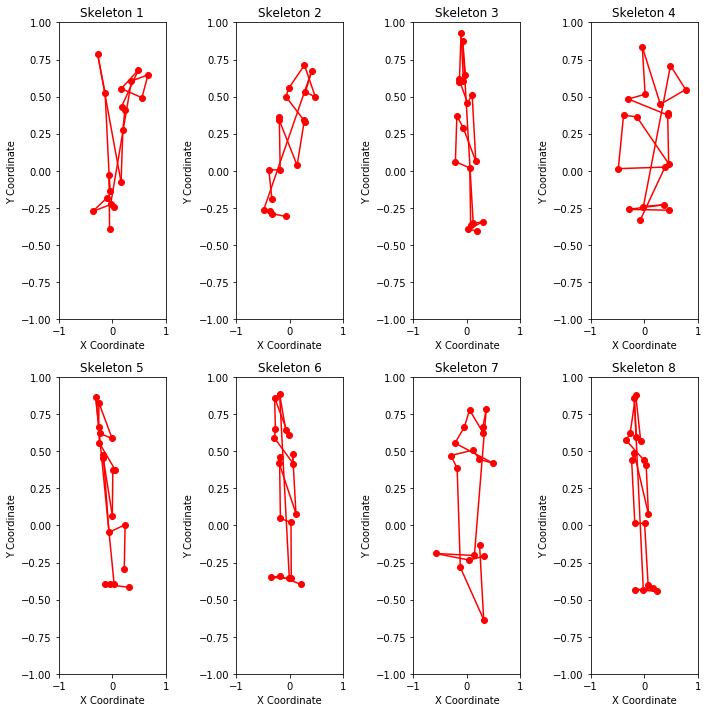

In [33]:
# top 8 with lowest variance

sorted_indexes_ = np.argsort(variances)

bottom_indexes = sorted_indexes_[:8]

# Create four subplots
fig, axs = plt.subplots(2, 4, figsize=(10, 10))

# Iterate over the skeleton indices and plot each skeleton
for i, ax in enumerate(axs.flatten()):
    # Extract the coordinates of the current skeleton
    skeleton_coords = dauphine_skel[:, bottom_indexes[i]].reshape(18, 2)
    
    # Plot the skeleton
    ax.scatter(skeleton_coords[:, 0], skeleton_coords[:, 1], color='red')
    
    # Connect the joints with lines
    for j in range(len(skeleton_coords)-1):
        ax.plot([skeleton_coords[j, 0], skeleton_coords[j+1, 0]],
                 [skeleton_coords[j, 1], skeleton_coords[j+1, 1]], color='red')
    
    # Set plot limits
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    
    # Add labels and title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(f'Skeleton {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
#805 of the top 1000 skeletons with lower variance had less than 10% NAs
bottom_1000_indexes = sorted_indexes_[:1000]
indexes_with_low_missing = missing_stats[missing_stats['Missing Percentage'] < 10].index

check_result = sum(index in indexes_with_low_missing for index in bottom_1000_indexes)
print(check_result)

805


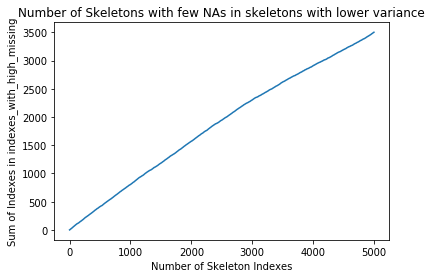

In [35]:
indexes_with_low_missing = missing_stats[missing_stats['Missing Percentage'] < 10].index
sum_values = []
index_range = range(5000)

for i in index_range:
    low_index = sorted_indexes_[:i]
    count = sum(index in indexes_with_low_missing for index in low_index)
    sum_values.append(count)
    
plt.plot(list(index_range)[:len(sum_values)], sum_values)
plt.xlabel('Number of Skeleton Indexes')
plt.ylabel('Sum of Indexes in indexes_with_high_missing')
plt.title('Number of Skeletons with few NAs in skeletons with lower variance')
plt.show()


In [46]:
#adicionar o número do frame 
frame = mat [0]
frame = frame.reshape(1,-1)
dauphine_skel = np.concatenate((frame, dauphine_skel), axis=0)

In [47]:
np.shape(dauphine_skel)

(37, 28232)

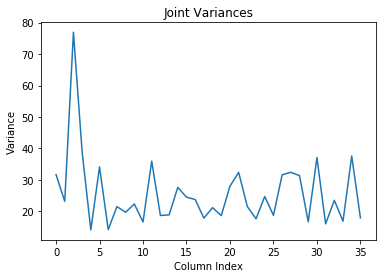

In [40]:
#Variance in terms of joints
variance_joints = np.var(dauphine_skel, axis=1)

# Plot the sorted variances
plt.plot(variance_joints)
plt.xlabel('Column Index')
plt.ylabel('Variance')
plt.title('Joint Variances')
plt.show()

In [56]:
skeletons.number_skeletons_per_frame(dauphine_skel)

for value, count in counts.items():
    print(f"Frame {value}: {count} skeletons")

Frame 0: 5 skeletons
Frame 1: 4 skeletons
Frame 2: 5 skeletons
Frame 3: 4 skeletons
Frame 4: 4 skeletons
Frame 5: 4 skeletons
Frame 6: 5 skeletons
Frame 7: 5 skeletons
Frame 8: 5 skeletons
Frame 9: 4 skeletons
Frame 10: 4 skeletons
Frame 11: 4 skeletons
Frame 12: 4 skeletons
Frame 13: 4 skeletons
Frame 14: 4 skeletons
Frame 15: 5 skeletons
Frame 16: 4 skeletons
Frame 17: 4 skeletons
Frame 18: 4 skeletons
Frame 19: 4 skeletons
Frame 20: 3 skeletons
Frame 21: 4 skeletons
Frame 22: 4 skeletons
Frame 23: 4 skeletons
Frame 24: 4 skeletons
Frame 25: 4 skeletons
Frame 26: 4 skeletons
Frame 27: 4 skeletons
Frame 28: 4 skeletons
Frame 29: 4 skeletons
Frame 30: 4 skeletons
Frame 31: 4 skeletons
Frame 32: 4 skeletons
Frame 33: 4 skeletons
Frame 34: 4 skeletons
Frame 35: 4 skeletons
Frame 36: 5 skeletons
Frame 37: 3 skeletons
Frame 38: 4 skeletons
Frame 39: 5 skeletons
Frame 40: 4 skeletons
Frame 41: 4 skeletons
Frame 42: 4 skeletons
Frame 43: 3 skeletons
Frame 44: 3 skeletons
Frame 45: 3 skeleton

Frame 2387: 1 skeletons
Frame 2388: 1 skeletons
Frame 2389: 1 skeletons
Frame 2390: 1 skeletons
Frame 2391: 1 skeletons
Frame 2392: 1 skeletons
Frame 2393: 5 skeletons
Frame 2394: 5 skeletons
Frame 2395: 5 skeletons
Frame 2396: 4 skeletons
Frame 2397: 4 skeletons
Frame 2398: 4 skeletons
Frame 2399: 6 skeletons
Frame 2400: 3 skeletons
Frame 2401: 4 skeletons
Frame 2402: 5 skeletons
Frame 2403: 4 skeletons
Frame 2404: 4 skeletons
Frame 2405: 6 skeletons
Frame 2406: 4 skeletons
Frame 2407: 4 skeletons
Frame 2408: 5 skeletons
Frame 2409: 4 skeletons
Frame 2410: 4 skeletons
Frame 2411: 4 skeletons
Frame 2412: 5 skeletons
Frame 2413: 5 skeletons
Frame 2414: 4 skeletons
Frame 2415: 3 skeletons
Frame 2416: 3 skeletons
Frame 2417: 3 skeletons
Frame 2418: 2 skeletons
Frame 2419: 3 skeletons
Frame 2420: 3 skeletons
Frame 2421: 4 skeletons
Frame 2422: 3 skeletons
Frame 2423: 3 skeletons
Frame 2424: 3 skeletons
Frame 2425: 3 skeletons
Frame 2426: 3 skeletons
Frame 2427: 4 skeletons
Frame 2428: 3 sk

Frame 3908: 2 skeletons
Frame 3909: 2 skeletons
Frame 3910: 2 skeletons
Frame 3911: 2 skeletons
Frame 3912: 2 skeletons
Frame 3913: 2 skeletons
Frame 3914: 2 skeletons
Frame 3915: 2 skeletons
Frame 3916: 2 skeletons
Frame 3917: 3 skeletons
Frame 3918: 3 skeletons
Frame 3919: 3 skeletons
Frame 3920: 4 skeletons
Frame 3921: 4 skeletons
Frame 3922: 3 skeletons
Frame 3923: 3 skeletons
Frame 3924: 3 skeletons
Frame 3925: 4 skeletons
Frame 3926: 4 skeletons
Frame 3927: 3 skeletons
Frame 3928: 3 skeletons
Frame 3929: 3 skeletons
Frame 3930: 3 skeletons
Frame 3931: 3 skeletons
Frame 3932: 3 skeletons
Frame 3933: 3 skeletons
Frame 3934: 2 skeletons
Frame 3935: 2 skeletons
Frame 3936: 2 skeletons
Frame 3937: 3 skeletons
Frame 3938: 3 skeletons
Frame 3939: 2 skeletons
Frame 3940: 2 skeletons
Frame 3941: 2 skeletons
Frame 3942: 2 skeletons
Frame 3943: 2 skeletons
Frame 3944: 2 skeletons
Frame 3945: 2 skeletons
Frame 3946: 2 skeletons
Frame 3947: 3 skeletons
Frame 3948: 3 skeletons
Frame 3949: 3 sk

Frame 5503: 1 skeletons
Frame 5504: 1 skeletons
Frame 5505: 1 skeletons
Frame 5506: 1 skeletons
Frame 5507: 1 skeletons
Frame 5508: 1 skeletons
Frame 5509: 1 skeletons
Frame 5510: 1 skeletons
Frame 5511: 1 skeletons
Frame 5512: 1 skeletons
Frame 5513: 1 skeletons
Frame 5514: 1 skeletons
Frame 5515: 1 skeletons
Frame 5516: 1 skeletons
Frame 5517: 1 skeletons
Frame 5518: 1 skeletons
Frame 5519: 1 skeletons
Frame 5520: 1 skeletons
Frame 5521: 1 skeletons
Frame 5522: 1 skeletons
Frame 5523: 1 skeletons
Frame 5524: 1 skeletons
Frame 5525: 1 skeletons
Frame 5526: 1 skeletons
Frame 5527: 1 skeletons
Frame 5528: 1 skeletons
Frame 5529: 1 skeletons
Frame 5530: 1 skeletons
Frame 5531: 1 skeletons
Frame 5532: 1 skeletons
Frame 5533: 1 skeletons
Frame 5534: 1 skeletons
Frame 5535: 1 skeletons
Frame 5536: 1 skeletons
Frame 5537: 1 skeletons
Frame 5538: 1 skeletons
Frame 5539: 1 skeletons
Frame 5540: 1 skeletons
Frame 5541: 1 skeletons
Frame 5542: 1 skeletons
Frame 5543: 1 skeletons
Frame 5544: 1 sk

Frame 7446: 2 skeletons
Frame 7447: 2 skeletons
Frame 7448: 2 skeletons
Frame 7449: 2 skeletons
Frame 7450: 3 skeletons
Frame 7451: 1 skeletons
Frame 7452: 2 skeletons
Frame 7453: 2 skeletons
Frame 7454: 2 skeletons
Frame 7455: 2 skeletons
Frame 7456: 2 skeletons
Frame 7457: 2 skeletons
Frame 7458: 1 skeletons
Frame 7459: 2 skeletons
Frame 7460: 1 skeletons
Frame 7461: 1 skeletons
Frame 7462: 2 skeletons
Frame 7463: 1 skeletons
Frame 7464: 2 skeletons
Frame 7465: 2 skeletons
Frame 7466: 1 skeletons
Frame 7467: 1 skeletons
Frame 7468: 1 skeletons
Frame 7469: 2 skeletons
Frame 7470: 2 skeletons
Frame 7471: 2 skeletons
Frame 7472: 1 skeletons
Frame 7473: 1 skeletons
Frame 7474: 1 skeletons
Frame 7475: 1 skeletons
Frame 7476: 1 skeletons
Frame 7477: 1 skeletons
Frame 7478: 1 skeletons
Frame 7479: 2 skeletons
Frame 7480: 6 skeletons
Frame 7481: 5 skeletons
Frame 7482: 5 skeletons
Frame 7483: 4 skeletons
Frame 7484: 5 skeletons
Frame 7485: 4 skeletons
Frame 7486: 5 skeletons
Frame 7487: 5 sk

Frame 9959: 1 skeletons
Frame 9960: 1 skeletons
Frame 9961: 1 skeletons
Frame 9962: 1 skeletons
Frame 9963: 1 skeletons
Frame 9964: 1 skeletons
Frame 9965: 1 skeletons
Frame 9966: 1 skeletons
Frame 9967: 1 skeletons
Frame 9968: 1 skeletons
Frame 9969: 1 skeletons
Frame 9970: 1 skeletons
Frame 9971: 1 skeletons
Frame 9972: 1 skeletons
Frame 9973: 1 skeletons
Frame 9974: 1 skeletons
Frame 9975: 1 skeletons
Frame 9976: 1 skeletons
Frame 9977: 1 skeletons
Frame 9978: 1 skeletons
Frame 9979: 1 skeletons
Frame 9980: 1 skeletons
Frame 9981: 1 skeletons
Frame 9982: 1 skeletons
Frame 9983: 1 skeletons
Frame 9984: 1 skeletons
Frame 9985: 1 skeletons
Frame 9986: 1 skeletons
Frame 9987: 1 skeletons
Frame 9988: 1 skeletons
Frame 9989: 1 skeletons
Frame 9990: 1 skeletons
Frame 9991: 1 skeletons
Frame 9992: 1 skeletons
Frame 9993: 1 skeletons
Frame 9994: 1 skeletons
Frame 9995: 1 skeletons
Frame 9996: 1 skeletons
Frame 9997: 1 skeletons
Frame 9998: 1 skeletons
Frame 9999: 1 skeletons
Frame 10000: 1 s

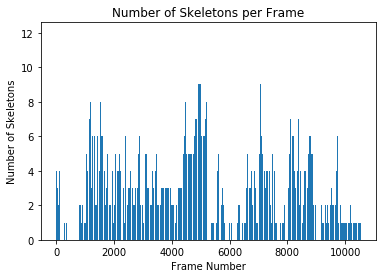

In [50]:
# Get the frame numbers and skeleton counts from the dictionary
frame_numbers = list(counts.keys())
skeleton_counts = list(counts.values())

# Plot the number of skeletons per frame
plt.bar(frame_numbers, skeleton_counts)
plt.xlabel('Frame Number')
plt.ylabel('Number of Skeletons')
plt.title('Number of Skeletons per Frame')
plt.show()